In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
ads_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-zakorko/shared/ads_data.csv.zip',compression='zip')

In [46]:
ads_data.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29


In [47]:
ads_data['full_data']= pd.to_datetime(ads_data.time,unit ='s')

In [48]:
ads_data['date']= pd.to_datetime(ads_data.date)

In [49]:
ads_data.dtypes

ad_id                             int64
time                              int64
event                            object
date                     datetime64[ns]
ad_cost_type                     object
has_video                         int64
client_union_id                   int64
campaign_union_id                 int64
platform                         object
ad_cost                         float64
target_audience_count             int64
user_id                           int64
full_data                datetime64[ns]
dtype: object

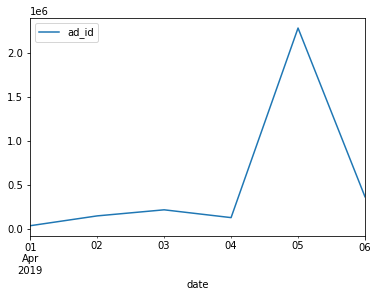

In [50]:
ads_data.groupby('date')\
    .agg({'ad_id':'count'}).plot()

In [51]:
ads_data.groupby(['date','event'],as_index=False)\
    .agg({'ad_id':'count'})\
    .pivot(index='date',columns='event',values='ad_id').reset_index()

event,date,click,view
0,2019-04-01,735,34832
1,2019-04-02,1518,145811
2,2019-04-03,1678,214851
3,2019-04-04,1517,126182
4,2019-04-05,501595,1783288
5,2019-04-06,80420,284287


In [52]:
ads_data[ads_data.date=='2019-04-05']\
    .groupby('ad_id')\
    .agg({'time':'count'})\
    .sort_values('time',ascending=False)\
    .head()

,time
ad_id,
112583,2166611
29927,27186
44635,8268
46583,7327
44956,5656


In [53]:
ad_id=112583

In [54]:
ads_data.query('ad_id==@ad_id').head(1)

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_data
527124,112583,1554480636,view,2019-04-05,CPM,0,111818,112260,web,199.4,239408,4355,2019-04-05 16:10:36


In [55]:
ads_data_by_ad=ads_data.groupby(['ad_id','event'],as_index=False)\
    .agg({'time':'count'})\
    .pivot(index ='ad_id',columns = 'event',values='time').reset_index()


In [62]:
ads_data_by_ad = ads_data_by_ad.assign(ctr = ads_data_by_ad.click / ads_data_by_ad.view,ctr_per =100*ads_data_by_ad.click / ads_data_by_ad.view)

In [63]:
ads_data_by_ad.sort_values('ctr',ascending=False).head(10)

event,ad_id,click,view,ctr,ctr_per
289,112583,580436.0,1934788.0,0.300000,29.999979
324,119450,258.0,1254.0,0.205742,20.574163
125,38575,43.0,257.0,0.167315,16.731518
144,40968,29.0,217.0,0.133641,13.364055
207,45642,42.0,344.0,0.122093,12.209302
283,110924,11.0,95.0,0.115789,11.578947
194,45043,28.0,245.0,0.114286,11.428571
96,35034,112.0,997.0,0.112337,11.233701
5,4585,53.0,476.0,0.111345,11.134454
328,120347,236.0,2168.0,0.108856,10.885609


In [64]:
ads_data_by_ad.ctr.mean()

0.020628096080757954

In [65]:
ads_data_by_ad.ctr.median()

0.010753240746688594

In [66]:
ads_data_by_ad.ctr.describe()

count    306.000000
mean       0.020628
std        0.030360
min        0.000451
25%        0.005943
50%        0.010753
75%        0.024072
max        0.300000
Name: ctr, dtype: float64

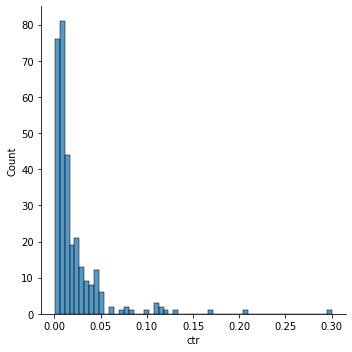

In [67]:
sns.displot(ads_data_by_ad.ctr,kde=False)

In [77]:
ads_data_by_ad=ads_data_by_ad.fillna(0)

In [78]:
ads_ids_bug=ads_data_by_ad.query('click==0').ad_id

In [79]:
ads_data[ads_data.ad_id.isin(ads_ids_bug)]\
    .groupby('platform',as_index=False)\
    .agg({'ad_id':'count'})\
    .sort_values('ad_id')

,platform,ad_id
2,web,1988
1,ios,3075
0,android,4906


In [80]:
ads_data\
    .groupby('platform',as_index=False)\
    .agg({'ad_id':'count'})\
    .sort_values('ad_id')

,platform,ad_id
2,web,635425
1,ios,953078
0,android,1588211


In [85]:
df_2019_04_04 = ads_data[ads_data.date=='2019-04-04'].groupby(['ad_id','event'],as_index=False)\
    .agg({'time':'count'})\
    .pivot(index ='ad_id',columns = 'event',values='time').reset_index()\
    .fillna(0)

In [86]:
df_2019_04_04['ctr'] =  df_2019_04_04.click / df_2019_04_04.view

In [94]:
df_2019_04_04[df_2019_04_04.click>0].ctr.quantile()

0.012658227848101266

In [100]:
ads_data[(ads_data.ad_cost_type=='CPC')&(ads_data.event=='click')].ad_cost.sum()

84810.0

In [102]:
ads_data[(ads_data.ad_cost_type=='CPM')&(ads_data.event=='view')].ad_cost.sum()/1000

497090.6778000003

In [105]:
ads_data.groupby(['ad_id','event'],as_index=False)\
    .agg({'time':'min'})\
    .pivot(index ='ad_id',columns = 'event',values='time').reset_index()\
    .query('click < view')

event,ad_id,click,view
27,16548,1.554336e+09,1.554336e+09
81,30939,1.554165e+09,1.554173e+09
138,40464,1.554164e+09,1.554164e+09
158,42007,1.554423e+09,1.554423e+09
185,44543,1.554336e+09,1.554337e+09
201,45436,1.554336e+09,1.554336e+09
324,119450,1.554336e+09,1.554336e+09


In [106]:
ads_data[ads_data.ad_id==16548].sort_values('time')

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_data
512690,16548,1554336083,click,2019-04-04,CPM,0,722,16523,ios,196.6,53199,4133,2019-04-04 00:01:23
511482,16548,1554336278,view,2019-04-04,CPM,0,722,16523,android,196.6,53199,3736,2019-04-04 00:04:38
511439,16548,1554336352,view,2019-04-04,CPM,0,722,16523,android,196.6,53199,4968,2019-04-04 00:05:52
511438,16548,1554336352,view,2019-04-04,CPM,0,722,16523,ios,196.6,53199,4206,2019-04-04 00:05:52
511437,16548,1554336352,view,2019-04-04,CPM,0,722,16523,web,196.6,53199,3898,2019-04-04 00:05:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056433,16548,1554422265,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,3613,2019-04-04 23:57:45
2056432,16548,1554422265,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,6044,2019-04-04 23:57:45
2056461,16548,1554422308,view,2019-04-05,CPM,0,722,16523,ios,196.6,53199,5831,2019-04-04 23:58:28
2056652,16548,1554422338,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,2837,2019-04-04 23:58:58
